## Part one of the task: you have to estimate the linear vector field that was used to generate the points $x_1$ from the points $x_0$

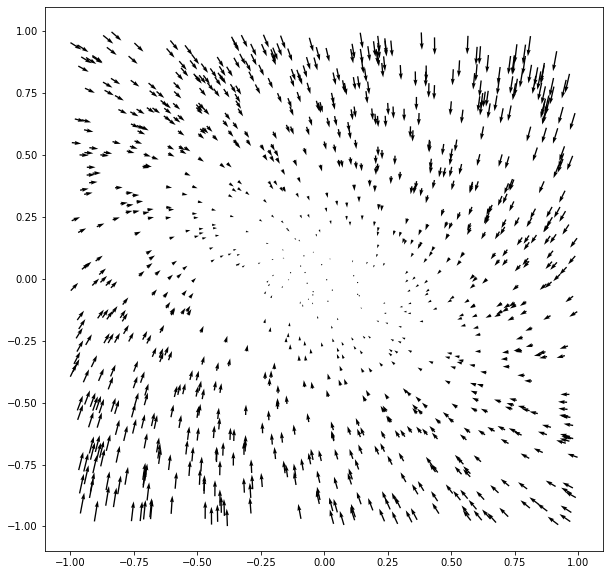

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
import math

data_x0 = np.loadtxt('./linear_vectorfield_data_x0.txt')
data_x1 = np.loadtxt('./linear_vectorfield_data_x1.txt')
x0x, x0y = data_x0.T
x1x, x1y = data_x1.T
xd = x1x-x0x
yd = x1y-x0y
fig = plt.figure(figsize=(10,10))

plt.quiver(x0x, x0y, xd, yd)
plt.show()

## Part two: compute the mean squared error of the vector field

In [2]:
def least_squares(x, y):
    a = np.vstack([x, np.ones(len(x))]).T
    return np.linalg.lstsq(a, y, rcond=None)[0]

def approximate(x0x, x0y, xd, yd):

    mx, cx = least_squares(x0x, xd)
    my, cy = least_squares(x0y, yd)

    fx = np.polyval([mx, cx], x0x)
    fy = np.polyval([my, cy], x0y)

    return mx, my, cx, cy, fx, fy

def evaluate(mx, my, x0x, x0y, t=1):
    
    ev_x = np.polyval([mx, cx], x0x)*t
    ep_x = ev_x + x0x

    ev_y = np.polyval([my, cy], x0y)*t
    ep_y = ev_y + x0y
    
    return ep_x, ep_y

def mse(x0x, x0y, mx, my, cx, cy, t=1):

    ep_x, ep_y = evaluate(mx, my, x0x, x0y, t)

    return np.mean(np.sqrt(np.square(ep_x - x1x) + np.square(ep_y - x1y))) 

mx, my, cx, cy, fx, fy = approximate(x0x, x0y, xd, yd)
print(mse(x0x, x0y, mx, my, cx, cy))

0.027557827015297486


Text(0.5, 1.0, 'Approximating vecter field')

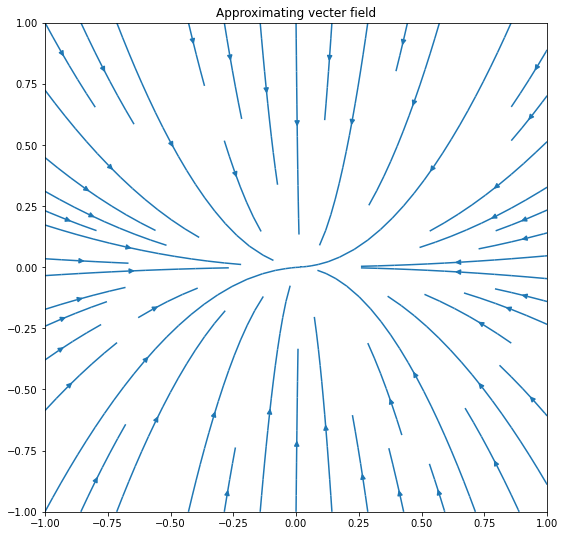

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

w = 1
alpha = 0.5
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = mx*X + cx
V = my*Y + cy
speed = np.sqrt(U**2 + V**2)


#gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
fig = plt.figure(figsize=(9, 9))
plt.streamplot(X, Y, U, V, density=[0.5, 1])
plt.title('Approximating vecter field')

## In part three, choose the initial point $(10, 10)$, far outside the initial data. Again solve the linear system with your matrix approximation, for $T_{end} = 100$, and visualize the trajectory as well as the phase portrait in a domain $[−10, 10]^2$.

In [7]:
dt = np.linspace(0.0001, 10, 10000)

losses = []

min_loss = 1000000
min_dt = -1

for i in dt:
    mx, my, cx, cy, fx, fy = approximate(x0x, x0y, xd/i, yd/i)
    loss = mse(x0x, x0y, mx, my, cx, cy)
    losses.append(loss)
    if loss < min_loss:
        min_loss = loss
        min_dt = i

print(min_loss, " - ", min_dt)

0.027556278453098878  -  1.0051904590459046


In [8]:
t = 0.1

xd = (x1x-x0x)/min_dt
yd = (x1y-x0y)/min_dt

mx, my, cx, cy, fx, fy = approximate(x0x, x0y, xd, yd)

loss = mse(x0x, x0y, mx, my, cx, cy, t)

print(loss)

0.05856682114045756


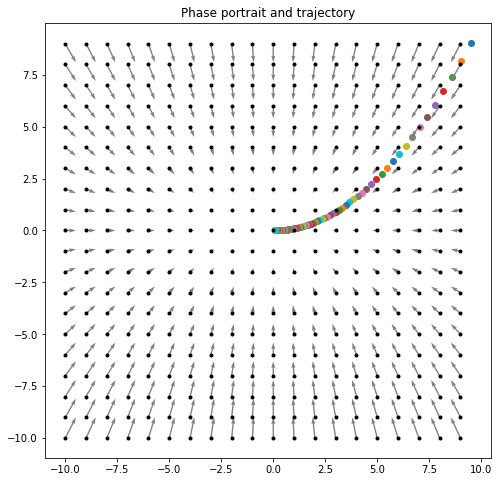

In [11]:
x0x = [10]
x0y = [10]

tt = np.linspace(1, 100, 100)

fig = plt.figure(figsize=(8,8))

for i in tt:
    
    ep_x, ep_y = evaluate(mx, my, x0x, x0y, t=1)
    
    x0x = ep_x
    x0y = ep_y
    
    plt.scatter(ep_x, ep_y)

x0xp = np.arange(-10, 10, 1)
x0yp = np.arange(-10, 10, 1)
xx, yy = np.meshgrid(x0xp, x0yp)

plt.plot(xx, yy, marker='.', color='k', linestyle='none')

ep_xp, ep_yp = evaluate(mx, my, xx, yy, t=1)
    
xdp = ep_xp-xx
ydp = ep_yp-yy   

plt.quiver(xx, yy, xdp, ydp, color='grey')
plt.title('Phase portrait and trajectory')
plt.show()